In [2]:
#dimensionality reduction 
#if in a dataset there is 100 columns then it will take too much time
#so we use D.R which reduce 100 columns into 2 columns without losing any information
#now time reduces and visualisation is improve 

In [3]:
#pca(principal component analysis)
#(a-lamba*I)=0   a is covariance of matrix of each column with each other column
#for above formula read about eigenvalues and eigenvectors

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv('Wine_P.csv')
dataset.head()  #classification dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
dataset.shape

(178, 14)

In [7]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,[-1]].values
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(142, 13)

In [9]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train.shape

(142, 13)

# PCA

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) #generally n_components=min(no. of output categories,features)-1
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [11]:
x_train.shape #dimension reduces from 13 to 2

(142, 2)

In [12]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)


c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [13]:
pred=model.predict(x_test)
pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [14]:
from sklearn .metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
clf=classification_report(y_test,pred)
print(clf)

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



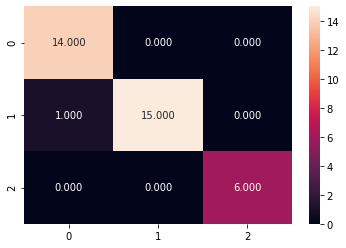

In [16]:
import seaborn as sns
sns.heatmap(cm,fmt='.3f',annot=True)
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)*100
acc

97.22222222222221

In [18]:
from sklearn.metrics import r2_score
sc=r2_score(y_test,pred)
sc

0.9451219512195121

# visualisation

In [19]:
from matplotlib.colors import ListedColormap

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

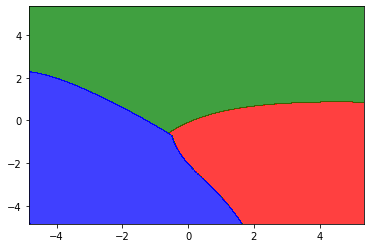

In [22]:
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01))

#ravel() is used to convert any nd-array into 1 d array
plt.contourf(x1,x2,model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())  #ylim for the size starting and ending of y axis valuWs

#for i,j in enumerate(np.unique(y_set)):   #enumerate gives index to all unique position
        #plt.scatter(x_set[y_set==j, 0],x_set[y_set==j,1]
          #         ,c=ListedColormap(('red','green','blue'))(i),label=j)


plt.show()

In [ ]:
print(x_set)


array([[-4.84416995, -4.84416995, -4.84416995, ..., -4.84416995,
        -4.84416995, -4.84416995],
       [-4.83416995, -4.83416995, -4.83416995, ..., -4.83416995,
        -4.83416995, -4.83416995],
       [-4.82416995, -4.82416995, -4.82416995, ..., -4.82416995,
        -4.82416995, -4.82416995],
       ...,
       [ 5.32583005,  5.32583005,  5.32583005, ...,  5.32583005,
         5.32583005,  5.32583005],
       [ 5.33583005,  5.33583005,  5.33583005, ...,  5.33583005,
         5.33583005,  5.33583005],
       [ 5.34583005,  5.34583005,  5.34583005, ...,  5.34583005,
         5.34583005,  5.34583005]])